<h1> <center> TRATAMIENTO DE DATOS NULOS </center> </h1>
<h2> <center> Caso: Tabla Periódica (PubChem) </center> </h2>

Se tiene una $dataframe$ con los datos de la tabla periódica, los $datos$ están distribuidos en $filas$ y $columnas$. Algunas de las columnas contienen datos nulos de tipo $NaN$. Se requiere encontrar $tendencias$ o relaciones entre las columnas de datos, por lo cual debe realizarse un $tratamiento$ a los datos nulos. 

Se proponen los siguientes tratamientos:

1. Sustituir $NaN's$ por ceros ($0$).
2. Sustituir $NaN's$ por el promedio de la columna.
3. Realizar una interpolación en el lugar de los datos $NaN's$.

Posterior al tratamiento de los datos se debe realizar una $regresión\:lineal$ de los datos en cada uno de los casos anteriores y verificar si la tendencia se ve afectada y en que magnitud.

In [1]:
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt

# Importar datos de tabla periódica de pubchem de la ruta: 
# "." a partir de la ubicación del notebook, ".." regresar un nivel
# "00_CSV" es la carpeta que contiene al archivo, "Elements.csv" es el archivo a leer
df = pd.read_csv('./../00_CSV/Elements.csv')

df

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,1,Solid,453.65,1615.00,0.534000,Alkali metal,1817
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,3,Solid,2348.00,4273.00,2.370000,Metalloid,1808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Fl,Flerovium,290.192000,NaN,[Rn]7s2 7p2 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"6, 4,2, 1, 0",Expected to be a Solid,NaN,NaN,NaN,Post-transition metal,1998
114,115,Mc,Moscovium,290.196000,NaN,[Rn]7s2 7p3 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"3, 1",Expected to be a Solid,NaN,NaN,NaN,Post-transition metal,2003
115,116,Lv,Livermorium,293.205000,NaN,[Rn]7s2 7p4 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"+4, +2, -2",Expected to be a Solid,NaN,NaN,NaN,Post-transition metal,2000
116,117,Ts,Tennessine,294.211000,NaN,[Rn]7s2 7p5 5f14 6d10 (predicted),NaN,NaN,NaN,NaN,"+5, +3, +1, -1",Expected to be a Solid,NaN,NaN,NaN,Halogen,2010


In [2]:
# Se hace una copia del dataframe:
df2 = df.copy()

# Nombres de las columnas para identificar las que no queremos borrar de df2
df2.columns

Index(['AtomicNumber', 'Symbol', 'Name', 'AtomicMass', 'CPKHexColor',
       'ElectronConfiguration', 'Electronegativity', 'AtomicRadius',
       'IonizationEnergy', 'ElectronAffinity', 'OxidationStates',
       'StandardState', 'MeltingPoint', 'BoilingPoint', 'Density',
       'GroupBlock', 'YearDiscovered'],
      dtype='object')

In [3]:
# Columnas a borrar de df2
coltodrop = ['CPKHexColor','ElectronConfiguration', 'Electronegativity', 
             'IonizationEnergy', 'ElectronAffinity', 'OxidationStates',
             'StandardState','YearDiscovered']

# Eliminar columnas asignadas a la variable "coltodrop"
df2 = df2.drop(columns = coltodrop)

df2

,AtomicNumber,Symbol,Name,AtomicMass,AtomicRadius,MeltingPoint,BoilingPoint,Density,GroupBlock
0,1,H,Hydrogen,1.008000,120.0,13.81,20.28,0.000090,Nonmetal
1,2,He,Helium,4.002600,140.0,0.95,4.22,0.000179,Noble gas
2,3,Li,Lithium,7.000000,182.0,453.65,1615.00,0.534000,Alkali metal
3,4,Be,Beryllium,9.012183,153.0,1560.00,2744.00,1.850000,Alkaline earth metal
4,5,B,Boron,10.810000,192.0,2348.00,4273.00,2.370000,Metalloid
...,...,...,...,...,...,...,...,...,...
113,114,Fl,Flerovium,290.192000,NaN,NaN,NaN,NaN,Post-transition metal
114,115,Mc,Moscovium,290.196000,NaN,NaN,NaN,NaN,Post-transition metal
115,116,Lv,Livermorium,293.205000,NaN,NaN,NaN,NaN,Post-transition metal
116,117,Ts,Tennessine,294.211000,NaN,NaN,NaN,NaN,Halogen


In [4]:
# Copia de data frame para tratamientos de datos nulos
df3 = df2.copy()

In [5]:
# Listas con las columnas de interés
num, mass, rad, den = df3['AtomicNumber'], df3['AtomicMass'], df3['AtomicRadius'], df3['Density']

den

0      0.000090
1      0.000179
2      0.534000
3      1.850000
4      2.370000
         ...   
113         NaN
114         NaN
115         NaN
116         NaN
117         NaN
Name: Density, Length: 118, dtype: float64

In [6]:
# Columna "Density" en el rango [0:97], sustituir los valores nulos con el promedio de rango:
mv = df3['Density'][0:96].mean()

df3['Density'][0:96].fillna(value = mv, inplace=True)

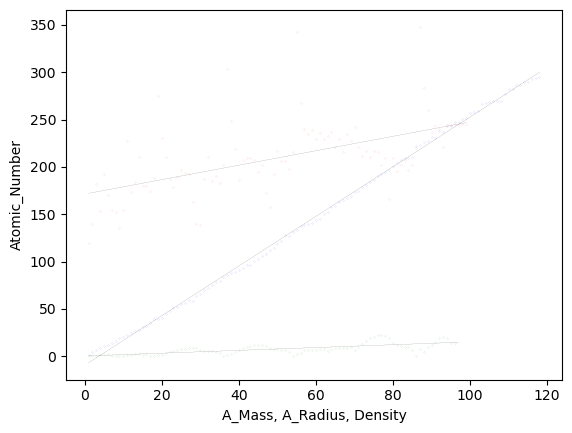

In [7]:
# Función Regresión Lineal
def relig(x,y):
    global Y
    
    n = len(x)      # Número de elementos
    
    # Sumatoria de x_i, Sumatoria de y_i
    Sx, Sy = sum(x), sum(y) 
    
    # Media de x_i, Media de y_i
    x_med, y_med = Sx/n, Sy/n   
    
    x2 = x ** 2     
    Sx2 = sum(x2)        # Sumatoria de los elementos x_i elevados al cuadrado
    
    producto_xy = x * y             
    Sproducto_xy = sum(producto_xy)   # Sumatoria del producto de los elentos x_i por y_i
    
    a_1 = ((n * Sproducto_xy) - (Sx * Sy)) / ((n * Sx2) - (Sx ** 2))
    a_0 = y_med - (a_1 * x_med) 
    
    Y = a_0 + (a_1 * x) 
    
    return Y

# Se opera la función en rangos de valores y se guardan los resultados en variables
masa, radio, densidad = relig(num, mass), relig(num[0:99], rad[0:99]), relig(num[0:97], den[0:97]) 

# Curvas [AtomicNumber vs AtomicMass, AtomicRadius, Density]
plt.plot(num, mass, '.', markersize=.1, color="blue") 
plt.plot(num[0:99], rad[0:99], '.', markersize=.1, color="red")  
plt.plot(num[0:96], den[0:96], '.', markersize=.1, color="green")
plt.plot(num, masa, ls='--', linewidth=.1, color="black") 
plt.plot(num[0:99], radio, ls='--', linewidth=.1, color="black")  
plt.plot(num[0:97], densidad, ls='--', linewidth=.1, color="black")

# Gráfico final:
plt.xlabel('A_Mass, A_Radius, Density')
plt.ylabel('Atomic_Number')
plt.savefig('STAT_TabPer1.pdf')  
plt.show()

In [8]:
# Información sobre los tipos de datos de cada columna
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AtomicNumber  118 non-null    int64  
 1   Symbol        118 non-null    object 
 2   Name          118 non-null    object 
 3   AtomicMass    118 non-null    float64
 4   AtomicRadius  99 non-null     float64
 5   MeltingPoint  103 non-null    float64
 6   BoilingPoint  93 non-null     float64
 7   Density       97 non-null     float64
 8   GroupBlock    118 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.4+ KB


In [9]:
# Estadísticas básicas de cada columna de datos:
df3.describe()

,AtomicNumber,AtomicMass,AtomicRadius,MeltingPoint,BoilingPoint,Density
count,118.000000,118.000000,99.000000,103.000000,93.000000,97.000000
mean,59.500000,146.539858,209.464646,1273.740553,2536.212473,7.607307
std,34.207699,89.768306,38.569130,888.853859,1588.410919,5.847997
min,1.000000,1.008000,120.000000,0.950000,4.220000,0.000090
25%,30.250000,66.480750,187.000000,516.040000,1180.000000,2.640000
50%,59.500000,142.573830,209.000000,1191.000000,2792.000000,7.134000
75%,88.750000,226.777165,232.000000,1806.500000,3618.000000,10.200000
max,118.000000,295.216000,348.000000,3823.000000,5869.000000,22.570000


In [10]:
# Copia de data frame para sustituir datos nulos con ceros
df4 = df3.copy()

# Sustituir los valores nulos del dataframe con ceros:
df4.fillna(value = 0, inplace=True)

# Crear listas con las columnas de interés
num2, mass2, rad2, den2 = df4['AtomicNumber'], df4['AtomicMass'], df4['AtomicRadius'], df4['Density']

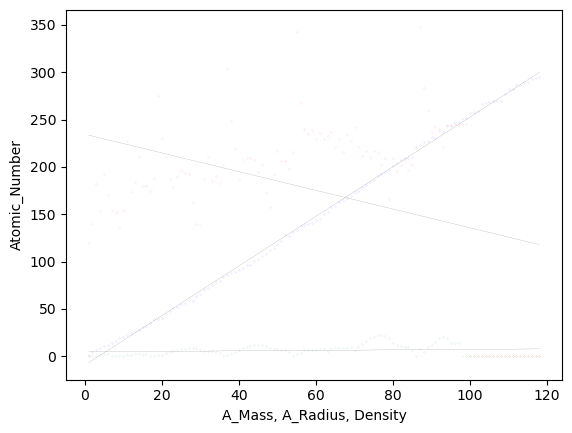

In [11]:
# Se opera la función en rangos de valores y se guardan los resultados en variables
masa2, radio2, densidad2 = relig(num2, mass2), relig(num2, rad2), relig(num2, den2) 

# Curvas [AtomicNumber vs AtomicMass, AtomicRadius, Density]
plt.plot(num2, mass2, '.', markersize=.1, color="blue") 
plt.plot(num2, rad2, '.', markersize=.1, color="red")  
plt.plot(num2, den2, '.', markersize=.1, color="green")
plt.plot(num2, masa2, ls='--', linewidth=.1, color="black") 
plt.plot(num2, radio2, ls='--', linewidth=.1, color="black")  
plt.plot(num2, densidad2, ls='--', linewidth=.1, color="black")

# Gráfico final:
plt.xlabel('A_Mass, A_Radius, Density')
plt.ylabel('Atomic_Number')
plt.savefig('STAT_TabPer2.pdf')  
plt.show()

In [12]:
# Valores nulos por columna:
colnames = df.columns

for column in colnames:
    print('NaN en <{0}>: {1}'.format(column, df[column].isnull().sum()))

NaN en <AtomicNumber>: 0
NaN en <Symbol>: 0
NaN en <Name>: 0
NaN en <AtomicMass>: 0
NaN en <CPKHexColor>: 10
NaN en <ElectronConfiguration>: 0
NaN en <Electronegativity>: 23
NaN en <AtomicRadius>: 19
NaN en <IonizationEnergy>: 16
NaN en <ElectronAffinity>: 61
NaN en <OxidationStates>: 1
NaN en <StandardState>: 0
NaN en <MeltingPoint>: 15
NaN en <BoilingPoint>: 25
NaN en <Density>: 22
NaN en <GroupBlock>: 0
NaN en <YearDiscovered>: 0


In [13]:
# Valores nulos por columna:
colnames = df2.columns

for column in colnames:
    print('NaN en <{0}>: {1}'.format(column, df2[column].isnull().sum()))

NaN en <AtomicNumber>: 0
NaN en <Symbol>: 0
NaN en <Name>: 0
NaN en <AtomicMass>: 0
NaN en <AtomicRadius>: 19
NaN en <MeltingPoint>: 15
NaN en <BoilingPoint>: 25
NaN en <Density>: 22
NaN en <GroupBlock>: 0


In [14]:
# Valores nulos por columna:
colnames = df3.columns

for column in colnames:
    print('NaN en <{0}>: {1}'.format(column, df3[column].isnull().sum()))

NaN en <AtomicNumber>: 0
NaN en <Symbol>: 0
NaN en <Name>: 0
NaN en <AtomicMass>: 0
NaN en <AtomicRadius>: 19
NaN en <MeltingPoint>: 15
NaN en <BoilingPoint>: 25
NaN en <Density>: 21
NaN en <GroupBlock>: 0
